In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [3]:
original_data = pd.read_csv("market_data.csv", sep=(","))
df = original_data.copy()
df.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


## Setting Headers & Indexes

In [4]:
df.rename(columns={
    "customerid": "id",
    "jobedu": "job",
}, inplace=True)

In [5]:
df.set_index("id", inplace=True)

In [6]:
df.head()

,age,salary,balance,marital,job,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
id,,,,,,,,,,,,,,,,,,
1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [7]:
df.index

Int64Index([    1,     2,     3,     4,     5,     6,     7,     8,     9,
               10,
            ...
            45202, 45203, 45204, 45205, 45206, 45207, 45208, 45209, 45210,
            45211],
           dtype='int64', name='id', length=45211)

In [8]:
df.shape

(45211, 18)

## Dropping Unnecassary features (Columns)

In [9]:
df.drop(["contact", "default", "poutcome"], axis=1, inplace=True)

In [10]:
df.head()

,age,salary,balance,marital,job,targeted,housing,loan,day,month,duration,campaign,pdays,previous,response
id,,,,,,,,,,,,,,,
1,58.0,100000,2143,married,"management,tertiary",yes,yes,no,5,"may, 2017",261 sec,1,-1,0,no
2,44.0,60000,29,single,"technician,secondary",yes,yes,no,5,"may, 2017",151 sec,1,-1,0,no
3,33.0,120000,2,married,"entrepreneur,secondary",yes,yes,yes,5,"may, 2017",76 sec,1,-1,0,no
4,47.0,20000,1506,married,"blue-collar,unknown",no,yes,no,5,"may, 2017",92 sec,1,-1,0,no
5,33.0,0,1,single,"unknown,unknown",no,no,no,5,"may, 2017",198 sec,1,-1,0,no


## Handling NAN values

In [11]:
df.isnull().sum()

age         20
salary       0
balance      0
marital      0
job          0
targeted     0
housing      0
loan         0
day          0
month       50
duration     0
campaign     0
pdays        0
previous     0
response    30
dtype: int64

In [12]:
from sklearn.impute import SimpleImputer

#### Age

In [13]:
age_si = SimpleImputer(missing_values=np.nan, strategy="mean")
age = age_si.fit_transform(df.age.values.reshape(-1, 1))
df.age = age
df.age.isnull().sum()

0

#### Response

In [14]:
response_si = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
response = response_si.fit_transform(df.response.values.reshape(-1, 1))
df.response = response
df.response.isnull().sum()

0

#### Month

In [15]:
df["month"].fillna(method="ffill", inplace=True)
df.month.isnull().sum()

0

In [16]:
df.isnull().sum()

age         0
salary      0
balance     0
marital     0
job         0
targeted    0
housing     0
loan        0
day         0
month       0
duration    0
campaign    0
pdays       0
previous    0
response    0
dtype: int64

So all NAN values have been removed

## Data Types

In [17]:
df.dtypes

age         float64
salary        int64
balance       int64
marital      object
job          object
targeted     object
housing      object
loan         object
day           int64
month        object
duration     object
campaign      int64
pdays         int64
previous      int64
response     object
dtype: object

#### Integer

In [18]:
df[["age", "campaign", "pdays", "previous", "day"]] = df[["age", "campaign", "pdays", "previous", "day"]].astype("int64")

#### Category

In [19]:
df[["loan", "targeted", "housing", "response"]] = df[["loan", "targeted", "housing", "response"]].astype("category")

#### Date

In [20]:
df["date" ] = df.day.astype("str") + ", " + df.month.astype("str")

In [21]:
df.drop(["day", "month"], inplace=True, axis=1)

In [22]:
df.date = pd.to_datetime(df.date)

#### Time

In [23]:
df.duration = pd.to_timedelta(df.duration)

In [24]:
df.dtypes

age                   int64
salary                int64
balance               int64
marital              object
job                  object
targeted           category
housing            category
loan               category
duration    timedelta64[ns]
campaign              int64
pdays                 int64
previous              int64
response           category
date         datetime64[ns]
dtype: object

## Feature Engineering

Applying feature engineering on every indivual feature(column)

#### Age

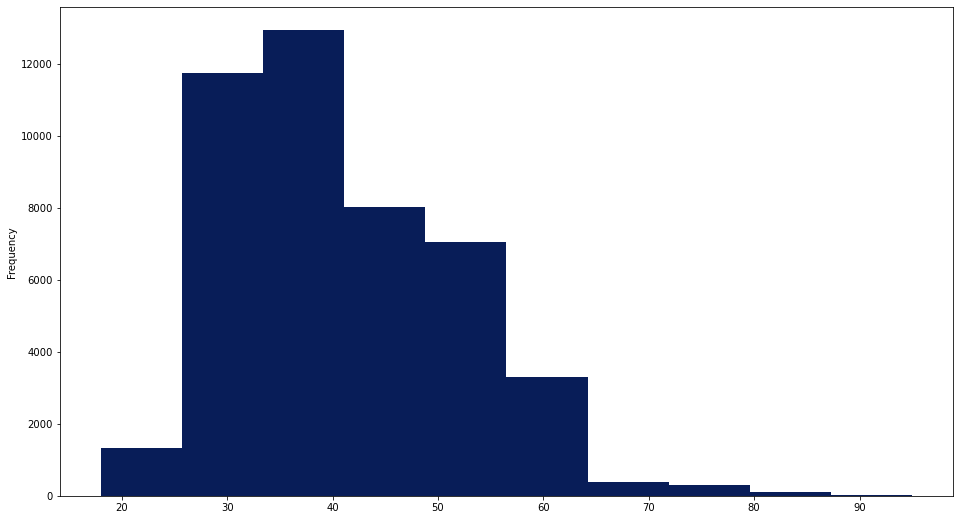

In [25]:
from matplotlib.colors import Colormap as cm
df.age.plot(kind="hist", colormap ="YlGnBu_r", figsize=(16, 9))

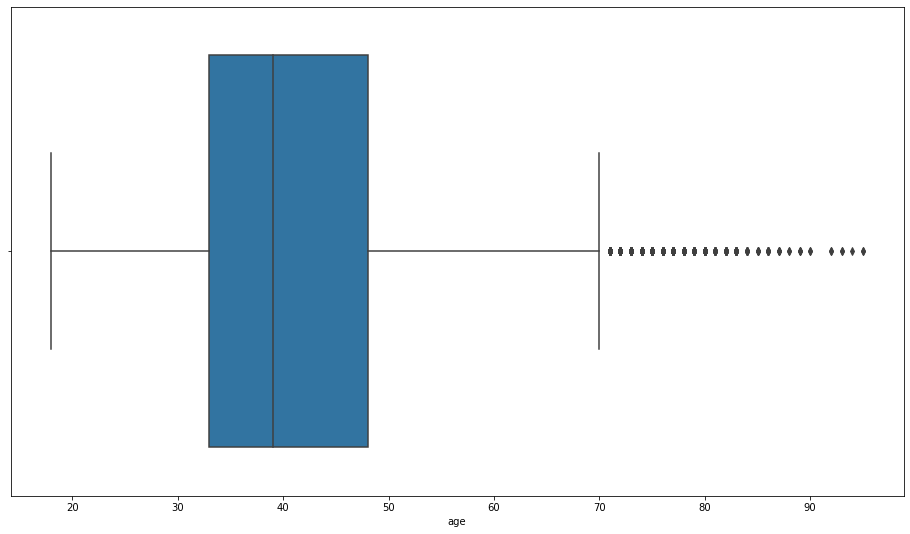

In [26]:
plt.figure(figsize=(16, 9))
sns.boxplot(x=df.age)
plt.show()

In [27]:
df[df["age"] > 70].shape[0]

487

In [28]:
ind_age = df[df["age"] > 70].index
ind_age

Int64Index([29159, 29262, 29264, 29323, 29866, 30226, 30265, 30909, 31052,
            31053,
            ...
            45102, 45105, 45110, 45119, 45142, 45164, 45192, 45205, 45208,
            45209],
           dtype='int64', name='id', length=487)

In [29]:
df.drop(df[df.age > 70].index, axis=0, inplace=True)

In [30]:
df[df["age"] > 70].shape[0]

0

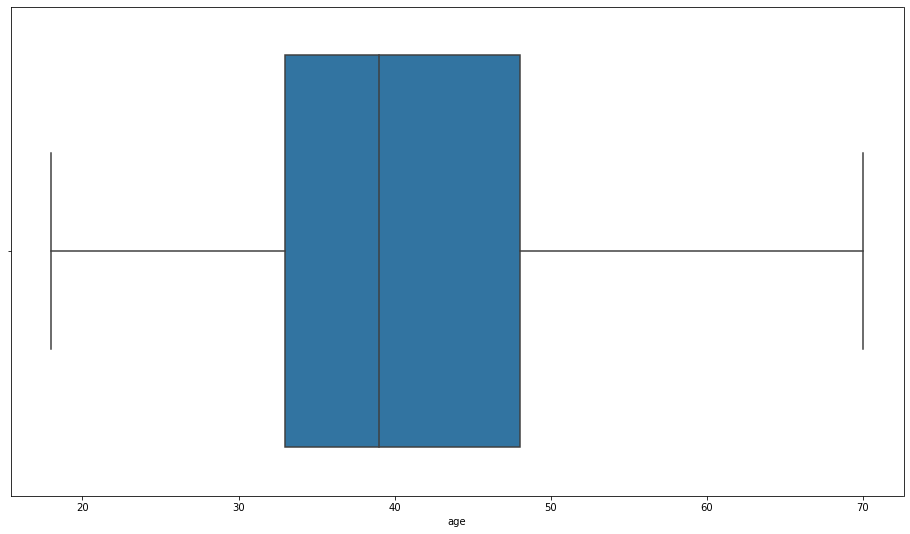

In [31]:
plt.figure(figsize=(16, 9))
sns.boxplot(x=df.age)
plt.show()

So all outliers from column AGE has bean removed.

#### Salary

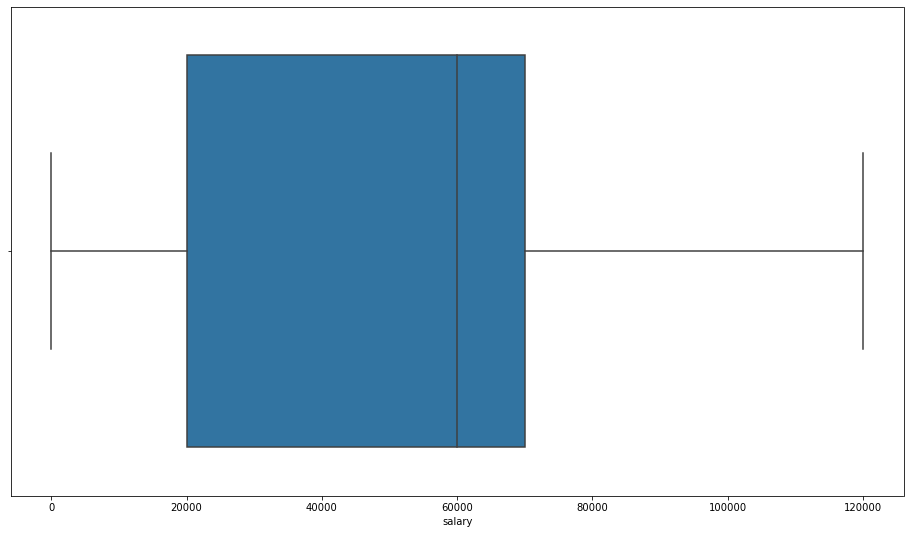

In [32]:
plt.figure(figsize=(16, 9))
sns.boxplot(x=df.salary)
plt.show()

In [33]:
df[df["salary"]==0]

,age,salary,balance,marital,job,targeted,housing,loan,duration,campaign,pdays,previous,response,date
id,,,,,,,,,,,,,,
5,33,0,1,single,"unknown,unknown",no,no,no,00:03:18,1,-1,0,no,2017-05-05
217,47,0,28,married,"unknown,unknown",no,no,no,00:05:38,2,-1,0,no,2017-05-05
355,59,0,27,divorced,"unknown,unknown",no,no,no,00:05:47,3,-1,0,no,2017-05-05
877,37,0,414,single,"unknown,unknown",no,yes,no,00:02:11,1,-1,0,no,2017-05-07
1073,29,0,50,single,"unknown,primary",yes,yes,no,00:00:50,2,-1,0,no,2017-05-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44682,55,0,159,married,"unknown,primary",yes,no,no,00:00:15,1,-1,0,no,2017-09-04
44715,45,0,406,married,"unknown,tertiary",yes,no,no,00:05:13.999999,1,-1,0,yes,2017-09-07
44743,64,0,2799,married,"unknown,unknown",no,no,no,00:06:18,4,-1,0,no,2017-09-09


We can see that persons having salary=0 also has unknown job, so if we don't know the job then how we can predict salary
that's why we have to drop these columns

In [34]:
ind_sal = df[df["salary"]==0].index
ind_sal

Int64Index([    5,   217,   355,   877,  1073,  1293,  2047,  2724,  2842,
             2849,
            ...
            44363, 44406, 44545, 44652, 44657, 44682, 44715, 44743, 44971,
            45187],
           dtype='int64', name='id', length=281)

In [35]:
df.drop(ind_sal, axis=0, inplace=True)

In [36]:
df[df["salary"]==0].shape[0]

0

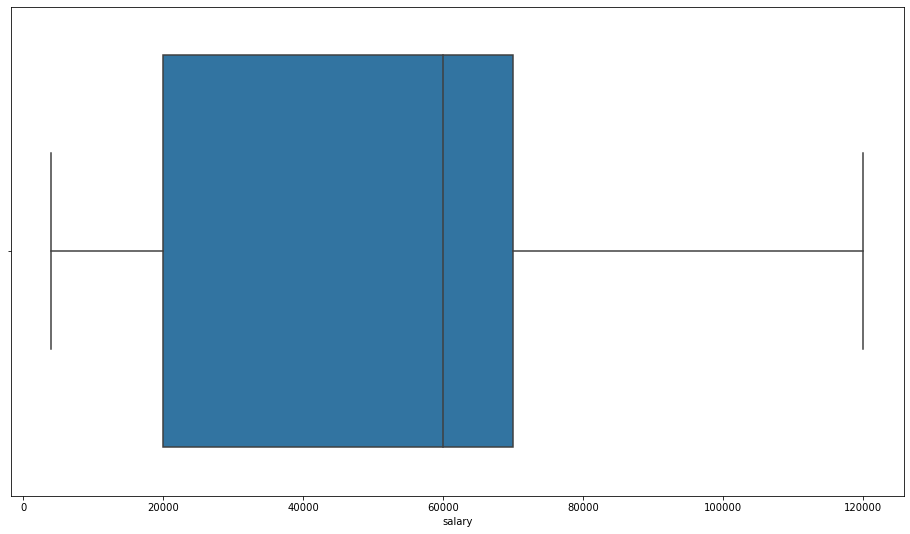

In [37]:
plt.figure(figsize=(16, 9))
sns.boxplot(x=df.salary)
plt.show()

#### Balance

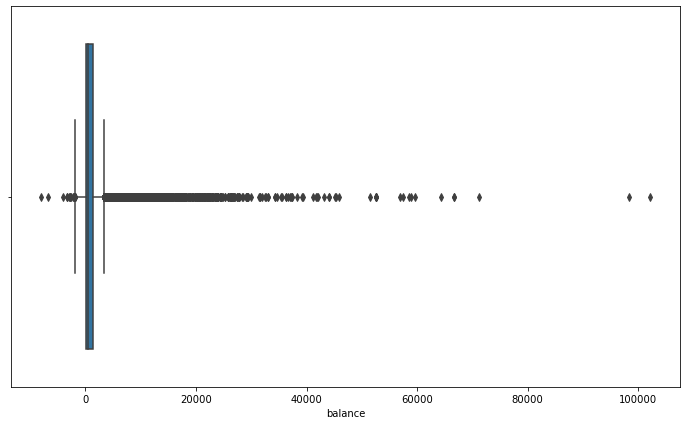

In [38]:
plt.figure(figsize=(12, 7))
sns.boxplot(x=df.balance)
plt.show()

Almost 80% data looks like outliers, that's why we'll not remove outliers except most dangerous

In [39]:
df[(df["balance"] > 50000) | (df["balance"] < -5000)].shape[0]

18

In [40]:
df.drop(df[(df["balance"] > 50000) | (df["balance"] < -5000)].index, inplace=True)

In [41]:
df[df["balance"] > 50000].shape[0]

0

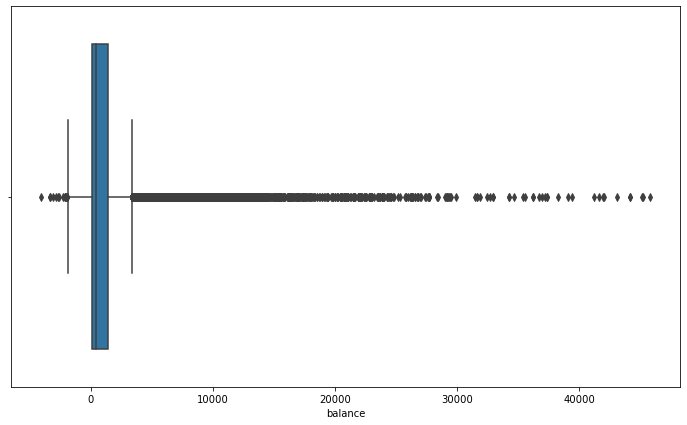

In [42]:
plt.figure(figsize=(12, 7))
sns.boxplot(x=df.balance)
plt.show()

#### Marital Status

In [43]:
df.groupby(by="marital").size()

marital
divorced     5079
married     26640
single      12706
dtype: int64

In [44]:
df.marital.replace(to_replace="int", value={
    "single": 1,
    "married": 2,
    "divorced": 3
}, inplace=True)

In [45]:
df.head()

,age,salary,balance,marital,job,targeted,housing,loan,duration,campaign,pdays,previous,response,date
id,,,,,,,,,,,,,,
1,58,100000,2143,married,"management,tertiary",yes,yes,no,00:04:21,1,-1,0,no,2017-05-05
2,44,60000,29,single,"technician,secondary",yes,yes,no,00:02:31,1,-1,0,no,2017-05-05
3,33,120000,2,married,"entrepreneur,secondary",yes,yes,yes,00:01:16,1,-1,0,no,2017-05-05
4,47,20000,1506,married,"blue-collar,unknown",no,yes,no,00:01:32,1,-1,0,no,2017-05-05
6,35,100000,231,married,"management,tertiary",yes,yes,no,00:02:19,1,-1,0,no,2017-05-05


#### Job, Target, Housing, Loan and Response

In [46]:
df.groupby(by="job").size()

job
admin.,primary              207
admin.,secondary           4217
admin.,tertiary             572
admin.,unknown              169
blue-collar,primary        3756
blue-collar,secondary      5367
blue-collar,tertiary        149
blue-collar,unknown         454
entrepreneur,primary        182
entrepreneur,secondary      541
entrepreneur,tertiary       683
entrepreneur,unknown         76
housemaid,primary           614
housemaid,secondary         393
housemaid,tertiary          173
housemaid,unknown            44
management,primary          293
management,secondary       1119
management,tertiary        7790
management,unknown          238
retired,primary             594
retired,secondary           861
retired,tertiary            292
retired,unknown              82
self-employed,primary       130
self-employed,secondary     576
self-employed,tertiary      829
self-employed,unknown        36
services,primary            345
services,secondary         3456
services,tertiary           202
serv

In [47]:
from sklearn.preprocessing import LabelEncoder

In [48]:
job_encoder = LabelEncoder()
df.job = job_encoder.fit_transform(df.job)

In [49]:
target_encoder = LabelEncoder()
df.targeted = target_encoder.fit_transform(df.targeted)

In [50]:
house_encoder = LabelEncoder()
df.housing = house_encoder.fit_transform(df.housing)

In [51]:
loan_encoder = LabelEncoder()
df.loan = loan_encoder.fit_transform(df.loan)

In [52]:
res_encoder = LabelEncoder()
df.response = res_encoder.fit_transform(df.response)

In [53]:
df.tail()

,age,salary,balance,marital,job,targeted,housing,loan,duration,campaign,pdays,previous,response,date
id,,,,,,,,,,,,,,
45204,23,4000,113,single,34,0,0,0,00:04:25.999999,1,-1,0,1,2017-11-17
45206,25,60000,505,single,37,1,0,1,00:06:25.999999,2,-1,0,1,2017-11-17
45207,51,60000,825,married,38,1,0,0,00:16:16.999999,3,-1,0,1,2017-11-17
45210,57,20000,668,married,5,1,0,0,00:08:28.000000,4,-1,0,0,2017-11-17
45211,37,120000,2971,married,9,1,0,0,00:06:01.000000,2,188,11,0,2017-11-17


#### Duration

In [54]:
df[df["duration"] > "0:30:0"].shape[0]

106

In [55]:
df.drop(df[df["duration"] > "0:30:0"].index, inplace=True, axis=0)

In [56]:
df[df["duration"] > "0:30:0"].shape[0]

0

I think now everything is OKAY. So now we have to visualize our cleaned data.

# Visualization

In [57]:
sns.set()

In [58]:
sns.set()
colors = sns.color_palette("Greens")

In [59]:
df1 = df[["age", "salary", "balance"]].copy()

<Figure size 1152x648 with 0 Axes>

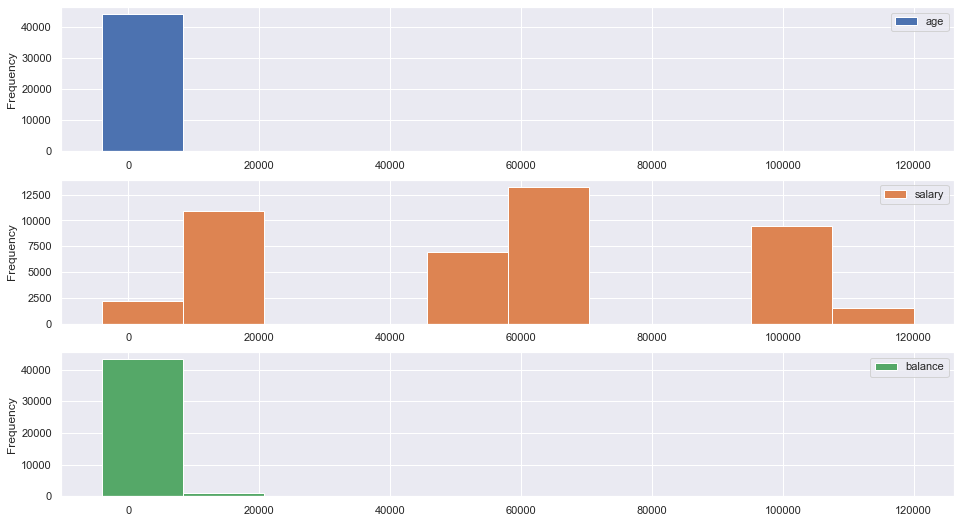

In [60]:
plt.figure(figsize=(16, 9))
df1.plot(kind="hist", subplots=True, sharex=False, figsize=(16, 9))
plt.show()

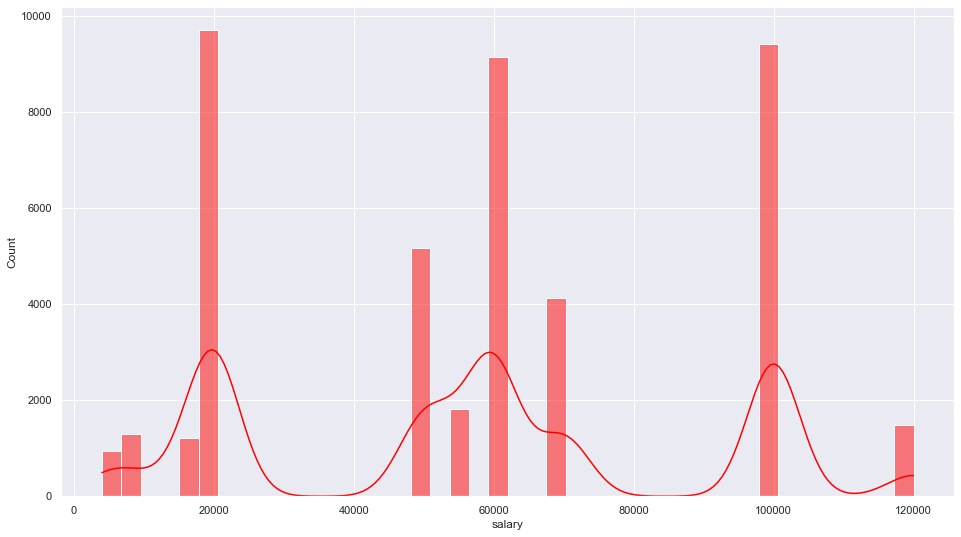

In [61]:
plt.figure(figsize=(16, 9))
sns.histplot(df.salary, kde=True, color="red")
plt.show()

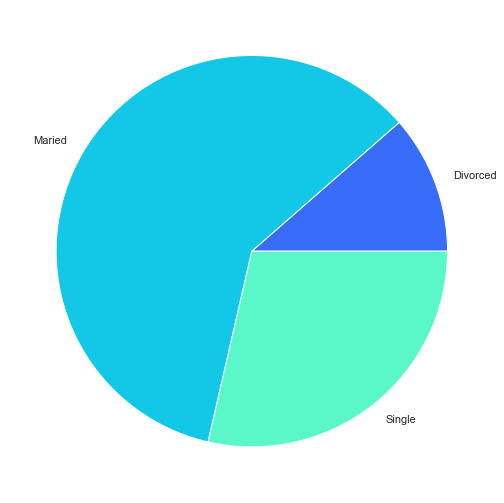

In [62]:
plt.figure(figsize=(16, 9))
plt.pie(df.groupby(by="marital").size(), labels=("Divorced", "Maried", "Single"), colors = sns.color_palette("rainbow"))
plt.show()

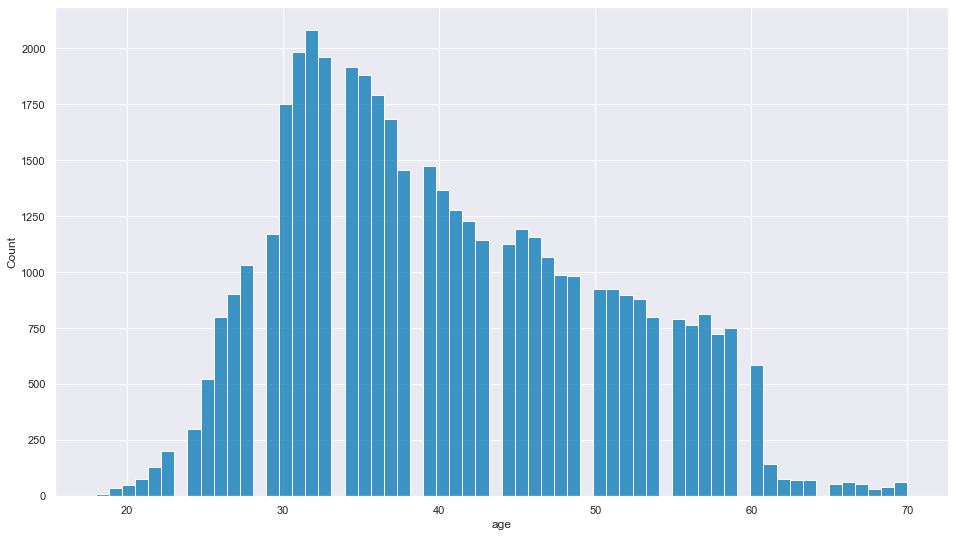

In [63]:
plt.figure(figsize=(16, 9))
sns.histplot(df.age, color="#0077B5")
plt.show()

In [64]:
df.head()

,age,salary,balance,marital,job,targeted,housing,loan,duration,campaign,pdays,previous,response,date
id,,,,,,,,,,,,,,
1,58,100000,2143,married,18,1,1,0,00:04:21,1,-1,0,0,2017-05-05
2,44,60000,29,single,37,1,1,0,00:02:31,1,-1,0,0,2017-05-05
3,33,120000,2,married,9,1,1,1,00:01:16,1,-1,0,0,2017-05-05
4,47,20000,1506,married,7,0,1,0,00:01:32,1,-1,0,0,2017-05-05
6,35,100000,231,married,18,1,1,0,00:02:19,1,-1,0,0,2017-05-05


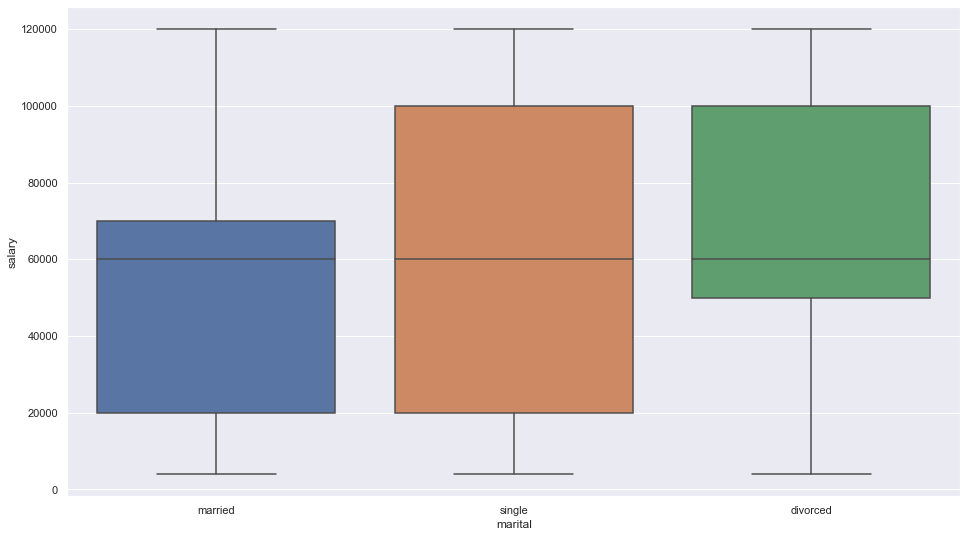

In [65]:
plt.figure(figsize=(16, 9))
sns.boxplot(x=df.marital, y=df.salary)
plt.show()

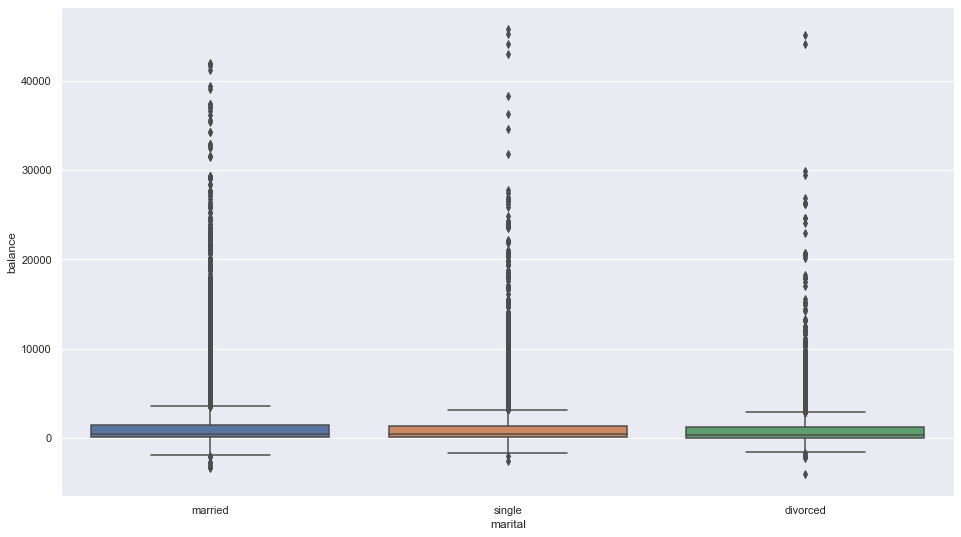

In [66]:
plt.figure(figsize=(16, 9))
sns.boxplot(x=df.marital, y=df.balance)
plt.show()

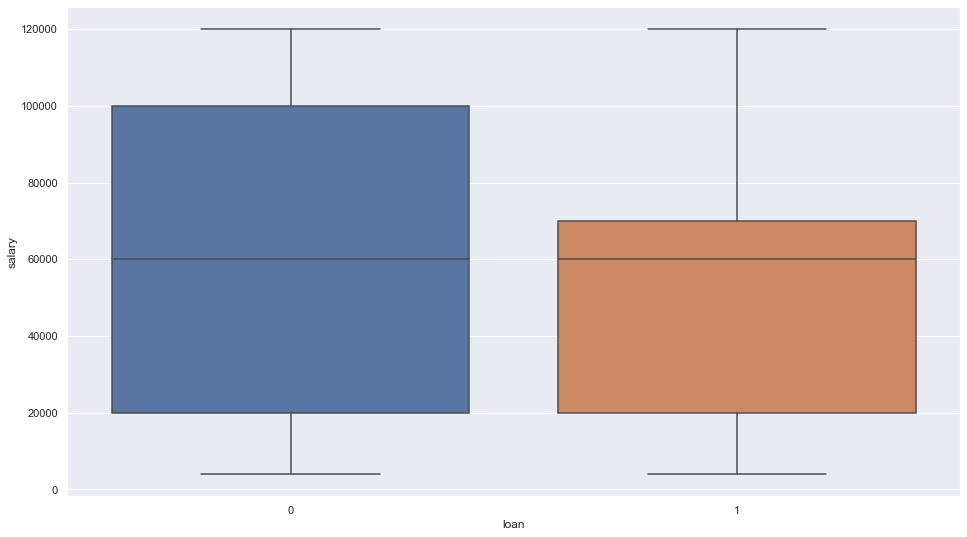

In [69]:
plt.figure(figsize=(16, 9))
sns.boxplot(x=df.loan, y=df.salary)
plt.show()

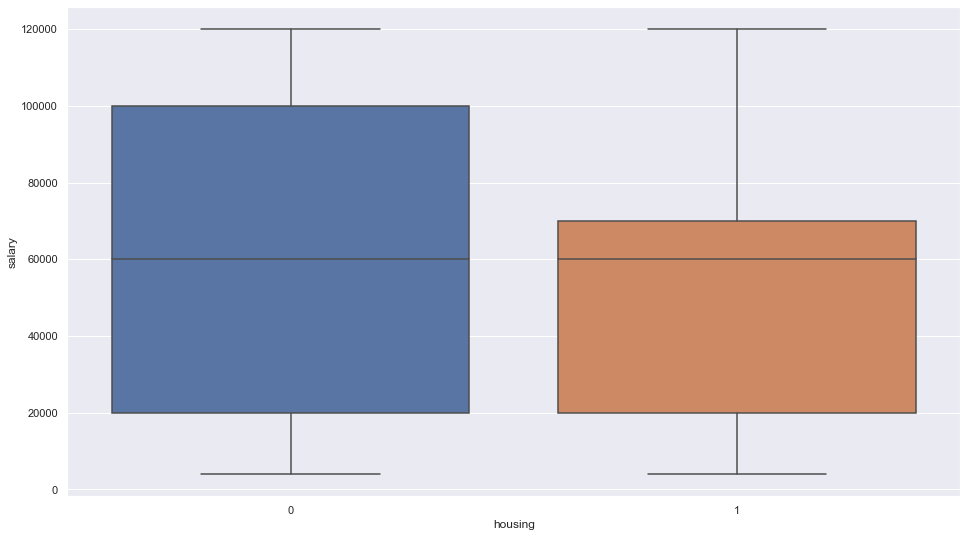

In [71]:
plt.figure(figsize=(16, 9))
sns.boxplot(x=df.housing, y=df.salary)
plt.show()

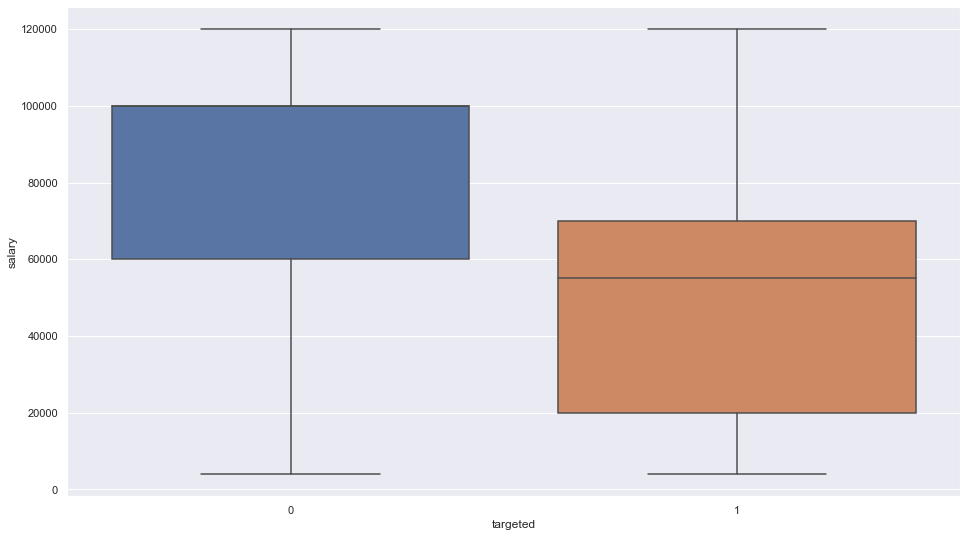

In [72]:
plt.figure(figsize=(16, 9))
sns.boxplot(x=df.targeted, y=df.salary)
plt.show()

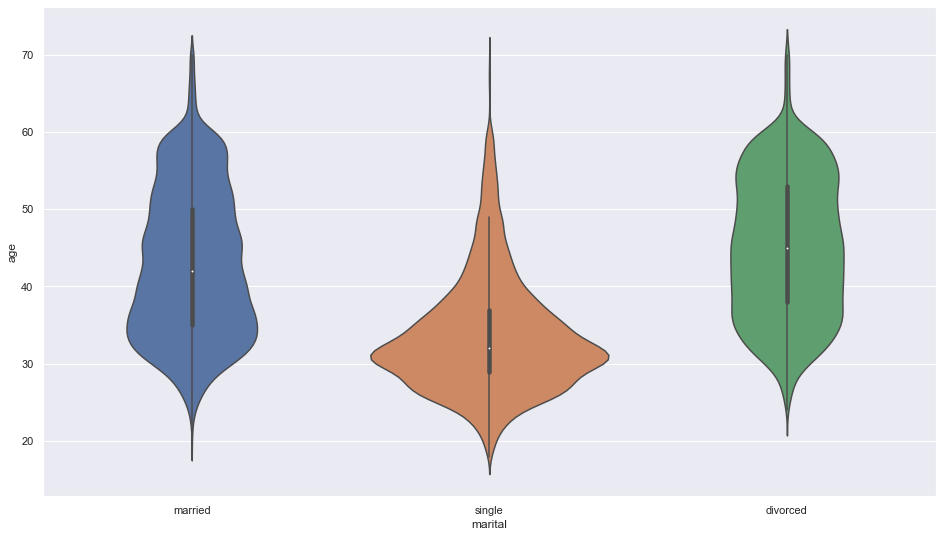

In [73]:
plt.figure(figsize=(16, 9))
sns.violinplot(x=df.marital, y=df.age)
plt.show()

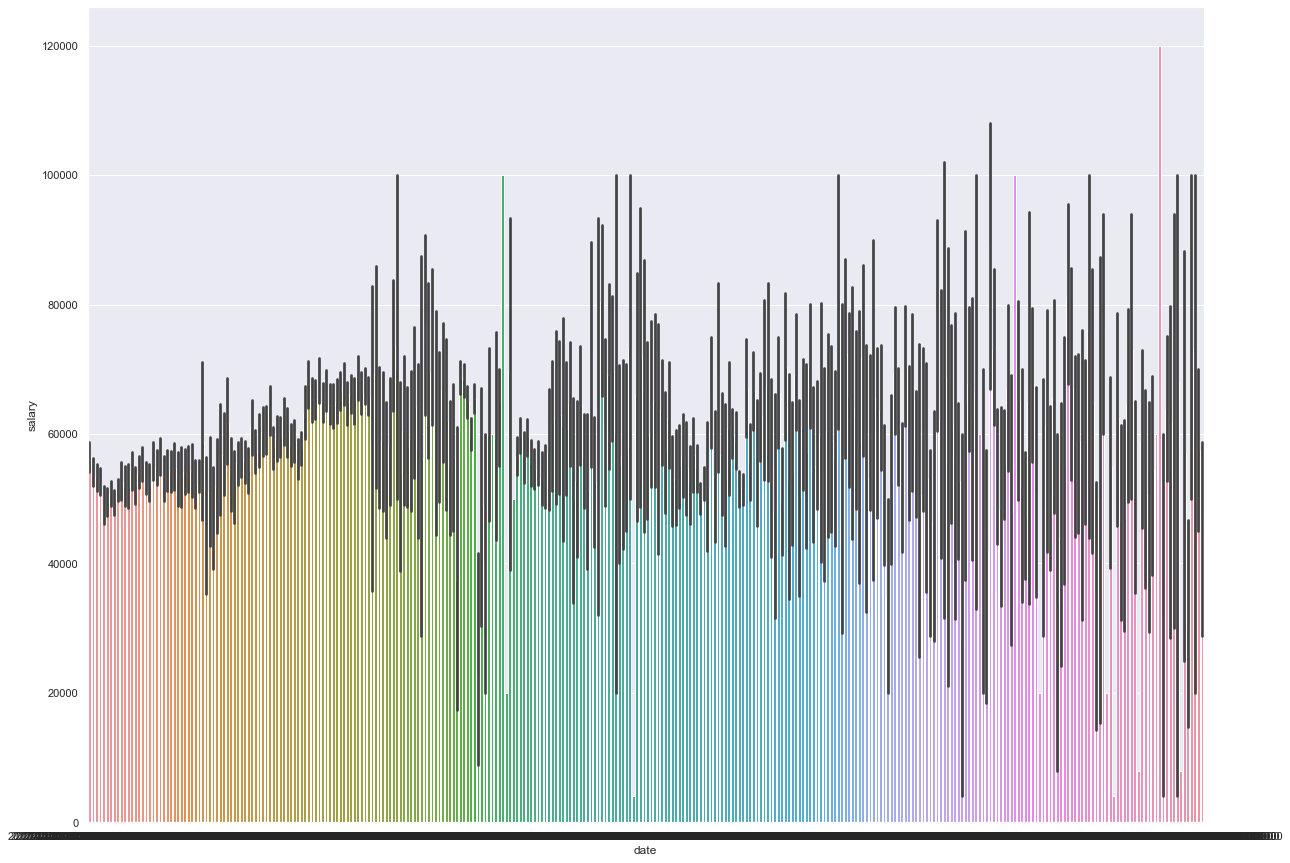

In [76]:
plt.figure(figsize=(20,15))
sns.barplot(x=df.date, y=df.salary)
plt.show()